In [2]:
library(dplyr)
library(reshape2)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Figure 5D

,Layer,value,Mice,se
,<chr>,<dbl>,<chr>,<dbl>
1,L1,0.08330025,GF,0.002201715
2,L2,0.07913631,GF,0.002138647
3,L3,0.07790404,GF,0.002124953
4,L4,0.07420639,GF,0.002070532
5,L5,0.07629600,GF,0.002082006
6,L6,0.07182766,GF,0.002043853


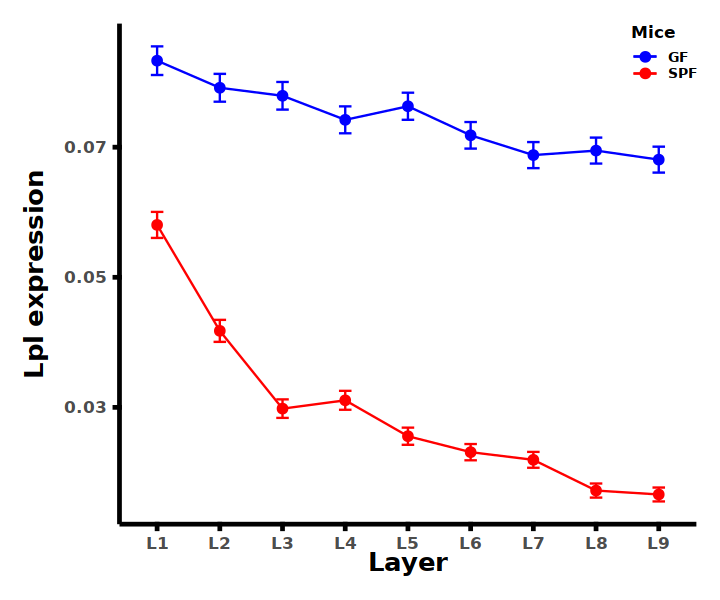

In [4]:
me <- read.csv("/data/work/08_plot/Lpl.xls",sep = "\t") 
# colnames(me)
me <- me %>% select(Layer,Lpl,mice,se)
colnames(me) <- c("Layer","value","Mice",'se')
head(me)

theme_self <- theme(
  axis.text.y = element_text(size = 10,face = "bold",margin  = margin(0,5,0,0)),
  axis.text.x = element_text(size = 10,face = "bold",margin  = margin(5,0,0,0)),
  axis.title.x= element_text(size = 15,face = "bold",margin  = margin(0,0,0,0)),
  axis.title.y= element_text(size = 15,face = "bold",margin  = margin(0,10,0,0)),
  axis.line = element_line(linetype = 1,color= "black",size = 1),
  legend.text = element_text(size = 8,face = "bold"),
  legend.title = element_text(size = 10,face = "bold"),
  panel.grid = element_blank(),
  plot.margin =  unit(c(0.5,0.5,0.5,0.5),"cm"), # lwm 2023 -7 - 7 
  axis.ticks  = element_line(color = "black",size = 1,lineend = 2),
  plot.title = element_text(hjust = 0.5,size = 30,face = "bold"))

y_title <- "Lpl expression"
p <- ggplot(me,aes(x = Layer,y = value,color = Mice,group = Mice)) + 
  geom_errorbar(aes(ymin = value - se,ymax = value + se),width = 0.2) + geom_line()  + 
  geom_point(size =3.5,shape = 20)  + labs(y = y_title )  + 
  scale_color_manual(values = c(SPF = "red", GF = "blue")) + theme_classic() +theme_self + 
  theme(legend.position = c(1,1),legend.justification = c(1,1),
        legend.margin=margin(b = -0.3, unit='cm'),legend.key.height = unit(0.1,"cm")) # 
options(repr.plot.width =6,repr.plot.height=5)
p